# Data set description
***This is a dataset for amazon sales in india for clothes for the year 2022***

### main columns description
**Category:**	Type of product. (String)<br>
**Size:**	Size of the product. (String)<br>
**Date:**	Date of the sale. (Date)<br>
**Status:**	Status of the shipping. (String)<br>
**Fulfilment:**	Who sold it, amazon or a merchant on amazon. (String)<br>
**Style:**	Style of the product. (String)<br>
**SKU:**	Stock Keeping Unit. (String)<br>
**ASIN:**	Amazon Standard Identification Number. (String)<br>
**Courier Status:** 	Status of the courier. (String)<br>
**Qty:**	Quantity of the product. (Integer)<br>
**Amount:** 	Amount of the sale. (Float)<br>
**B2B:**	Business to business sale. (Boolean)<br>
**Currency:**	The currency used for the sale. (String)<br>

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

In [465]:
import time

In [448]:
df = pd.read_csv("amazon_sale_report.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\3200021347.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("amazon_sale_report.csv")


# Data exploration

In [449]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

***cleaning notes***
<br>- change the data type in "date" to datetime

In [7]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [9]:
df["Sales Channel "].value_counts()

Amazon.in     128851
Non-Amazon       124
Name: Sales Channel , dtype: int64

***Cleaning note***
<br>-Since this is supposed to be an amazon dataset so i will remove the rows wich are not amzon, then remove the whole column
<br>- I will remove the "index column"

In [82]:
df = df[df["Sales Channel "] == "Amazon.in"]

In [84]:
df["Sales Channel "].value_counts()

Amazon.in    124363
Name: Sales Channel , dtype: int64

In [11]:
df["Status"].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

**Cleaning notes**
<br>- "Shipped", "Shipped - Delivered to Buyer", "Shipped - Picked Up", "Shipped - Out for Delivery", and "Shipping", i will change them to just "delivered"
<br>- "Cancelled" i will keep it the same
<br>- "Shipped - Returned to Seller", "Shipped - Returning to Seller", and "Shipped - Rejected by Buyer" i will change them to "returned"
<br>- "pending" and "Pending - Waiting for Pick Up" i will make them "pending"
<br>- "lost in transit" i will make it "lost"
<br>- "Damaged" I will remove it becouse it's just one value

<br>**Another note**
<br>For the "Shipped - Picked Up" values this means that it didn't reach the buyer yet, and it's not confirmed wether the buyer accepted it or not, but i will assume that it has been accepted, to be able to continue my analysis

In [13]:
df["Fulfilment"].value_counts()

Amazon      89698
Merchant    39277
Name: Fulfilment, dtype: int64

In [14]:
df["ship-service-level"].value_counts()

Expedited    88615
Standard     40360
Name: ship-service-level, dtype: int64

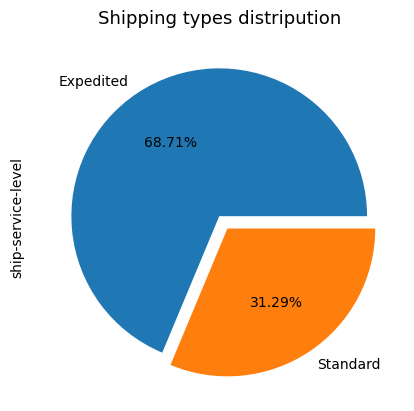

In [46]:
df["ship-service-level"].value_counts().plot(kind = "pie", autopct = "%1.2f%%", explode = [0, 0.1])
plt.title("Shipping types distripution", size = 13);

In [21]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [32]:
df["Courier Status"].value_counts()

Shipped      109487
Unshipped      6681
Cancelled      5935
Name: Courier Status, dtype: int64

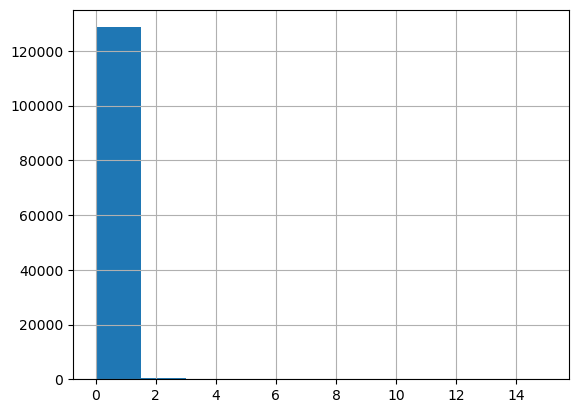

In [34]:
df["Qty"].hist();

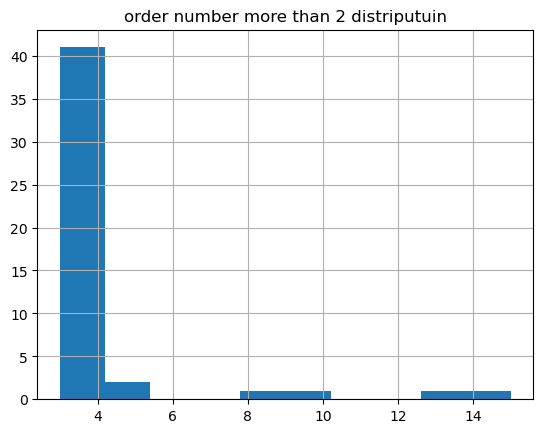

In [40]:
df.query("Qty >2")["Qty"].hist()
plt.title("order number more than 2 distriputuin");

In [41]:
df["currency"].value_counts()

INR    121180
Name: currency, dtype: int64

***since all of the sales are in india so the cuureny is the Indian Rupee***

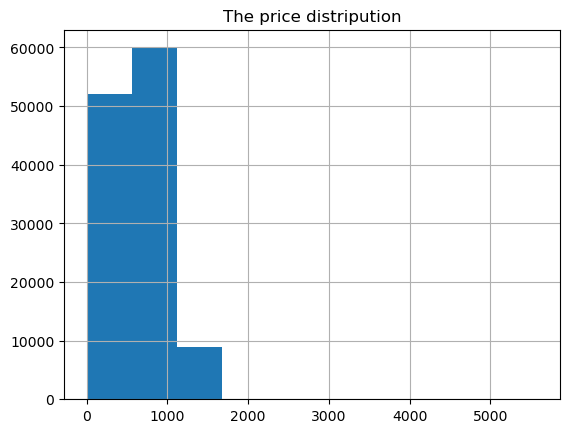

In [55]:
df["Amount"].hist()
plt.title("The price distripution");

In [56]:
df["ship-country"].value_counts()

IN    128942
Name: ship-country, dtype: int64

***Cleaning note***
<br>- all the products are shipped from india so i will just delete this column

In [58]:
df["fulfilled-by"].value_counts()

Easy Ship    39277
Name: fulfilled-by, dtype: int64

In [108]:
df["Category"].value_counts()

Set              48784
kurta            47769
Western Dress    14780
Top              10368
Ethnic Dress      1152
Blouse             900
Bottom             421
Saree              155
Dupatta              2
Name: Category, dtype: int64

***Cleaning Notes***
<br>I will delete "index", "Order ID", "Style", "SKU", "ASIN", "Courier Status", "currency", "Ship postal code", "Ship country", "promotion ids", "unames", "fuffilled-by"

In [61]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [110]:
#i wil delete the columns before moving on
df.drop(["index", "Order ID", "Style", "SKU", "ASIN", "Courier Status", "currency", "ship-postal-code", "ship-country", "promotion-ids",
        "fulfilled-by", "Unnamed: 22", "Sales Channel "], axis = 1, inplace = True)

KeyError: "['index', 'Order ID', 'Style', 'SKU', 'ASIN', 'Courier Status', 'currency', 'ship-postal-code', 'ship-country', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22'] not found in axis"

In [111]:
df.drop(["Sales Channel "], axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\3841788493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Sales Channel "], axis = 1, inplace = True)


In [112]:
df

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
0,04-30-22,Cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,04-30-22,Shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,04-30-22,Cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY,False
4,04-30-22,Shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
128970,05-31-22,Shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False
128971,05-31-22,Shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False
128972,05-31-22,Shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False
128973,05-31-22,Shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                128975 non-null  object 
 1   Status              128975 non-null  object 
 2   Fulfilment          128975 non-null  object 
 3   Sales Channel       128975 non-null  object 
 4   ship-service-level  128975 non-null  object 
 5   Category            128975 non-null  object 
 6   Size                128975 non-null  object 
 7   Qty                 128975 non-null  int64  
 8   Amount              121180 non-null  float64
 9   ship-city           128942 non-null  object 
 10  ship-state          128942 non-null  object 
 11  B2B                 128975 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 10.9+ MB


In [68]:
df.duplicated().sum()

4515

In [70]:
df.drop_duplicates(inplace = True)

In [71]:
df.duplicated().sum()

0

In [74]:
df.isnull().sum()

Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Qty                      0
Amount                6992
ship-city               32
ship-state              32
B2B                      0
dtype: int64

In [85]:
#I want to see the rows that has null values in the amount since the amount is the most important thing
df[df["Amount"].isnull()]

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
8,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Set,3XL,0,NaN,HYDERABAD,TELANGANA,False
29,04-30-22,Cancelled,Merchant,Amazon.in,Standard,kurta,3XL,0,NaN,GUWAHATI,ASSAM,False
65,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,XXL,0,NaN,Dahod,Gujarat,False
84,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,M,0,NaN,HYDERABAD,TELANGANA,False
95,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,L,0,NaN,PUNE,MAHARASHTRA,False
...,...,...,...,...,...,...,...,...,...,...,...,...
128902,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Western Dress,L,0,NaN,ANANTAPUR,ANDHRA PRADESH,False
128903,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,M,0,NaN,ANANTAPUR,ANDHRA PRADESH,False
128907,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Set,3XL,0,NaN,GREATER NOIDA,UTTAR PRADESH,False
128958,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Set,L,0,NaN,Bengaluru,KARNATAKA,False


In [88]:
len(df[df["Status"] == "Cancelled"])

16941

In [78]:
df[df["Amount"].isnull()]["Status"].value_counts()

Cancelled                       6797
Shipped                          176
Shipped - Delivered to Buyer       8
Shipping                           6
Shipped - Returned to Seller       3
Pending                            2
Name: Status, dtype: int64

It seems that most of the null values in the "Amount" column are for orders that have been canceld, and if i just deleted these rows i will affects the number of cancelled values in this dataset, ***So i will fill the null values with the average***

In [90]:
amount_mean = np.mean(df["Amount"])
df["Amount"].fillna(amount_mean, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\3623162978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"].fillna(amount_mean, inplace = True)


In [91]:
df.isnull().sum()

Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Category               0
Size                   0
Qty                    0
Amount                 0
ship-city             32
ship-state            32
B2B                    0
dtype: int64

Now we have replaced all the null values "in the amount with the average"

In [92]:
df[df["ship-city"].isnull()]

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
1871,04-29-22,Shipped,Amazon,Amazon.in,Expedited,Top,L,1,493.000000,NaN,NaN,False
1872,04-29-22,Shipped,Amazon,Amazon.in,Expedited,kurta,L,1,458.000000,NaN,NaN,False
8752,04-25-22,Shipped,Amazon,Amazon.in,Expedited,kurta,M,1,432.000000,NaN,NaN,False
11215,04-23-22,Shipped,Amazon,Amazon.in,Expedited,Set,S,1,654.000000,NaN,NaN,False
13252,04-22-22,Cancelled,Merchant,Amazon.in,Standard,kurta,S,0,380.000000,NaN,NaN,False
15688,04-21-22,Shipped,Amazon,Amazon.in,Expedited,kurta,M,1,442.000000,NaN,NaN,False
16787,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,1,376.000000,NaN,NaN,False
18351,04-19-22,Shipped,Amazon,Amazon.in,Expedited,Set,XS,1,1112.000000,NaN,NaN,False
22930,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Set,S,1,654.000000,NaN,NaN,False
24986,04-15-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,XXL,1,399.000000,NaN,NaN,False


In [94]:
#I will drop these rows
df.dropna(inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\2186172192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [95]:
df.isnull().sum()

Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Qty                   0
Amount                0
ship-city             0
ship-state            0
B2B                   0
dtype: int64

In [96]:
df.describe()

,Qty,Amount
count,124331.000000,124331.000000
mean,0.908896,649.763664
std,0.302049,274.330628
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,634.290000
75%,1.000000,771.000000
max,8.000000,5584.000000


**There are values that make no since like 0 in both columns**

In [99]:
zero_df = df[df["Qty"] == 0]
zero_df

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.620000,MUMBAI,MAHARASHTRA,False
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.330000,PUDUCHERRY,PUDUCHERRY,False
8,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Set,3XL,0,649.750067,HYDERABAD,TELANGANA,False
23,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Set,M,0,570.480000,pune,MAHARASHTRA,False
29,04-30-22,Cancelled,Merchant,Amazon.in,Standard,kurta,3XL,0,649.750067,GUWAHATI,ASSAM,False
...,...,...,...,...,...,...,...,...,...,...,...,...
128902,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Western Dress,L,0,649.750067,ANANTAPUR,ANDHRA PRADESH,False
128903,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,M,0,649.750067,ANANTAPUR,ANDHRA PRADESH,False
128907,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Set,3XL,0,649.750067,GREATER NOIDA,UTTAR PRADESH,False
128958,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Set,L,0,649.750067,Bengaluru,KARNATAKA,False


In [100]:
zero_df["Status"].value_counts()

Cancelled                       11664
Shipped                            86
Shipped - Delivered to Buyer        8
Shipped - Returned to Seller        3
Pending                             2
Name: Status, dtype: int64

There are alot of rows with "Qty" values = 0, and they represnt most of the rows with "Cancelled" in "Status", so i can't delete these rows, so i will replace 0 with the average value which is 1

***limitation to the study***
<br> there are alot of missing values that i had to replace 

In [102]:
df["Qty"].replace(0, 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\2176274595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Qty"].replace(0, 1, inplace = True)


In [103]:
df.describe()

,Qty,Amount
count,124331.000000,124331.000000
mean,1.003507,649.763664
std,0.070072,274.330628
min,1.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,634.290000
75%,1.000000,771.000000
max,8.000000,5584.000000


In [104]:
zero_df = df[df["Amount"] == 0]
zero_df

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
212,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,XXL,1,0.0,BHUBANESWAR,ODISHA,False
374,04-30-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Western Dress,M,1,0.0,NEW DELHI,DELHI,False
385,04-30-22,Shipped,Amazon,Amazon.in,Standard,kurta,L,1,0.0,DARJEELING,WEST BENGAL,False
388,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Western Dress,XS,1,0.0,LUDHIANA,PUNJAB,False
392,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Set,L,1,0.0,MUMBAI,MAHARASHTRA,False
...,...,...,...,...,...,...,...,...,...,...,...,...
128550,06-01-22,Shipped,Amazon,Amazon.in,Expedited,Set,L,1,0.0,CHENNAI,TAMIL NADU,False
128612,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Bottom,M,1,0.0,INDORE,MADHYA PRADESH,False
128685,06-01-22,Shipped,Amazon,Amazon.in,Standard,Western Dress,M,1,0.0,MOHALI,PUNJAB,False
128804,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Set,XL,1,0.0,VADAKARA,KERALA,False


I will deal with them as NaN values and replace them with the average

In [105]:
df["Amount"].replace(0, amount_mean, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\631101926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"].replace(0, amount_mean, inplace = True)


In [107]:
df.describe()

,Qty,Amount
count,124331.000000,124331.000000
mean,1.003507,661.809524
std,0.070072,259.393523
min,1.000000,199.000000
25%,1.000000,469.000000
50%,1.000000,641.000000
75%,1.000000,771.000000
max,8.000000,5584.000000


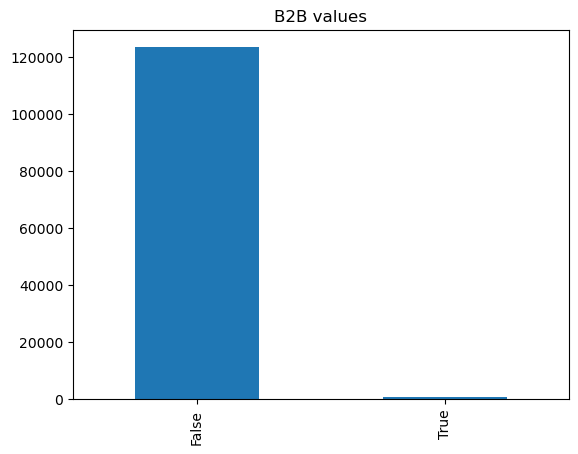

In [242]:
df["B2B"].value_counts().plot(kind = "bar")
plt.title("B2B values");

## Cleaning
I made some cleaning steps in the last section, but they where essintial for my exploration, put here i will do most of the cleaning work

First thing i want to change some names for some columns

In [ ]:
df.columns

In [ ]:
df = df.rename(columns = {"Status": "shipping_status",
                          "Fulfilment": "fulfilment",
                          "ship-service-level": "shipping_type",
                          "Category": "category",
                          "Size": "size",
                          "Qty": "items_number",
                         "Amount": "amount",
                         "ship-city": "city",
                         "ship-state": "state"})

In [ ]:
df = df.rename(columns = {"Date":"date"})

In [134]:
# I will change the data type in this column to time
df["date"] = pd.to_datetime(df["date"])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124330 entries, 0 to 128974
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             124330 non-null  datetime64[ns]
 1   shipping_status  124330 non-null  object        
 2   fulfilment       124330 non-null  object        
 3   shipping_type    124330 non-null  object        
 4   category         124330 non-null  object        
 5   size             124330 non-null  object        
 6   items_number     124330 non-null  int64         
 7   amount           124330 non-null  float64       
 8   city             124330 non-null  object        
 9   state            124330 non-null  object        
 10  B2B              124330 non-null  bool          
 11  month            124330 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 11.5+ MB


In [136]:
# I will add a new column with the year of the sale
df["year"] = df["date"].dt.year

In [137]:
df.head(2)

,date,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state,B2B,year
0,2022-04-30,cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False,2022
1,2022-04-30,shipped,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,2022


In [138]:
df["year"].value_counts()

2022    124330
Name: year, dtype: int64

all the values are the year 2022 so i will delete this column

In [139]:
df.drop(["year"], axis = 1, inplace = True)

In [140]:
#I will add a new column with the month
df["month"] = df["date"].dt.month

In [141]:
df["month"].value_counts()

4    47193
5    40478
6    36490
3      169
Name: month, dtype: int64

We have 4 months in this dataset "March", "April", "May", "June", so i will rename the vlues in the dataset

In [144]:
df["month"].replace(3, "march", inplace = True)
df["month"].replace(4, "april", inplace = True)
df["month"].replace(5, "may", inplace = True)
df["month"].replace(6, "june", inplace = True)

In [145]:
df["month"].value_counts()

april    47193
may      40478
june     36490
march      169
Name: month, dtype: int64

In [147]:
# I will add a new column with the day
df["day"] = df["date"].dt.day_name()

In [148]:
df["day"].value_counts()

Sunday       18886
Tuesday      18205
Monday       17960
Wednesday    17875
Saturday     17814
Friday       17095
Thursday     16495
Name: day, dtype: int64

In [149]:
df

,date,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state,B2B,month,day
0,2022-04-30,cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False,april,Saturday
1,2022-04-30,shipped,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,april,Saturday
2,2022-04-30,shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,april,Saturday
3,2022-04-30,cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY,False,april,Saturday
4,2022-04-30,shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False,april,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False,may,Tuesday
128971,2022-05-31,shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False,may,Tuesday
128972,2022-05-31,shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False,may,Tuesday
128973,2022-05-31,shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False,may,Tuesday


In [152]:
# I want to change the order of the columns
df = df.iloc[:, [0, 12, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [117]:
df["shipping_status"].value_counts()

Shipped                          75215
Shipped - Delivered to Buyer     28165
Cancelled                        16934
Shipped - Returned to Seller      1942
Shipped - Picked Up                966
Pending                            644
Pending - Waiting for Pick Up      271
Shipped - Returning to Seller      143
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: shipping_status, dtype: int64

<br>- "Shipped", "Shipped - Delivered to Buyer", "Shipped - Picked Up", "Shipped - Out for Delivery", i will change them to just "delivered"
<br>- "Cancelled" i will keep it the same
<br>- "Shipped - Returned to Seller", "Shipped - Returning to Seller", and "Shipped - Rejected by Buyer" i will change them to "returned"
<br>- "pending" and "Pending - Waiting for Pick Up" i will make them "pending"
<br>- "lost in transit" i will make it "lost"
<br>- "Damaged" I will remove it becouse it's just one value

In [ ]:
df["shipping_status"].replace("Shipped - Delivered to Buyer", "Shipped", inplace = True)

In [123]:
df["shipping_status"].replace("Shipped - Picked Up", "Shipped", inplace = True)
df["shipping_status"].replace("Shipped - Out for Delivery", "Shipped", inplace = True)
df["shipping_status"].replace("Shipped", "shipped", inplace = True)
df["shipping_status"].replace("Cancelled", "cancelled", inplace = True)
df["shipping_status"].replace("Shipped - Returned to Seller", "returned", inplace = True)
df["shipping_status"].replace("Shipped - Returning to Seller", "returned", inplace = True)
df["shipping_status"].replace("Shipped - Rejected by Buyer", "returned", inplace = True)
df["shipping_status"].replace("Pending", "pending", inplace = True)
df["shipping_status"].replace("Pending - Waiting for Pick Up", "pending", inplace = True)
df["shipping_status"].replace("Shipped - Lost in Transit", "lost", inplace = True)

In [124]:
df = df[df["shipping_status"] != "Shipped - Damaged"]

In [125]:
df["shipping_status"].value_counts()

shipped      104381
cancelled     16934
returned       2096
pending         915
lost              4
Name: shipping_status, dtype: int64

# Analysis

## 1- For the busines owner, basic statitcs
**I will make my mane varible is the catgeory ("Traditional, Set, others), and i will give him statitcs about it** 

- The size of each category
- the dominant fulfilment of each catgeory
- the highst city in each category
- the average amount of each category
- shipping_type for each category

In [275]:
df

,date,day,month,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state,B2B
0,2022-04-30,Saturday,april,cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False
1,2022-04-30,Saturday,april,shipped,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,2022-04-30,Saturday,april,shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,2022-04-30,Saturday,april,cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY,False
4,2022-04-30,Saturday,april,shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False
128971,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False
128972,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False
128973,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False


In [273]:
# I want to make a copy to work with, and i will delte the column that i won't need here
df_statistics = df.drop(["B2B", "date"], axis = 1)

In [274]:
df_statistics

,day,month,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state
0,Saturday,april,cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA
1,Saturday,april,shipped,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA
2,Saturday,april,shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA
3,Saturday,april,cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY
4,Saturday,april,shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU
...,...,...,...,...,...,...,...,...,...,...,...
128970,Tuesday,may,shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA
128971,Tuesday,may,shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA
128972,Tuesday,may,shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA
128973,Tuesday,may,shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat


In [276]:
df_statistics["category"].value_counts()

Set              48784
kurta            47769
Western Dress    14779
Top              10368
Ethnic Dress      1152
Blouse             900
Bottom             421
Saree              155
Dupatta              2
Name: category, dtype: int64

In [286]:
df_statistics["category"].iloc[5] == "Set"

True

In [287]:
"""
This for loop is going to iterate over all of the values in the dataset and create a new column, that shows if the type 
of clothes is tradional indian or set or others

tradional indian are("kurta", "Ethnic Dress", "Saree", "Dupatta")
"""
dress_type = []

for index in range(len(df_statistics)):
    if df_statistics["category"].iloc[index] == "Set":
        dress_type.append("set")
    elif df_statistics["category"].iloc[index] == "kurta":
        dress_type.append("traditional")
    elif df_statistics["category"].iloc[index] == "Ethnic Dress":
        dress_type.append("traditional")
    elif df_statistics["category"].iloc[index] == "Saree":
        dress_type.append("traditional")
    elif df_statistics["category"].iloc[index] == "Dupatta":
        dress_type.append("traditional")
    else:
        dress_type.append("others")
        
        

In [290]:
df_statistics["dress_type"] = dress_type

In [292]:
df_statistics = df_statistics.iloc[:, [0, 1, 2, 3, 4, 5, 11, 6, 7, 8, 9, 10]]

In [297]:
# Now we don't need the category column
df_statistics.drop(["category"], axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\425232688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics.drop(["category"], axis = 1, inplace = True)


In [298]:
df_statistics

,day,month,shipping_status,fulfilment,shipping_type,dress_type,size,items_number,amount,city,state
0,Saturday,april,cancelled,Merchant,Standard,set,S,1,647.62,MUMBAI,MAHARASHTRA
1,Saturday,april,shipped,Merchant,Standard,traditional,3XL,1,406.00,BENGALURU,KARNATAKA
2,Saturday,april,shipped,Amazon,Expedited,traditional,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA
3,Saturday,april,cancelled,Merchant,Standard,others,L,1,753.33,PUDUCHERRY,PUDUCHERRY
4,Saturday,april,shipped,Amazon,Expedited,others,3XL,1,574.00,CHENNAI,TAMIL NADU
...,...,...,...,...,...,...,...,...,...,...,...
128970,Tuesday,may,shipped,Amazon,Expedited,traditional,XL,1,517.00,HYDERABAD,TELANGANA
128971,Tuesday,may,shipped,Amazon,Expedited,set,M,1,999.00,GURUGRAM,HARYANA
128972,Tuesday,may,shipped,Amazon,Expedited,others,XXL,1,690.00,HYDERABAD,TELANGANA
128973,Tuesday,may,shipped,Amazon,Expedited,set,XS,1,1199.00,Halol,Gujarat


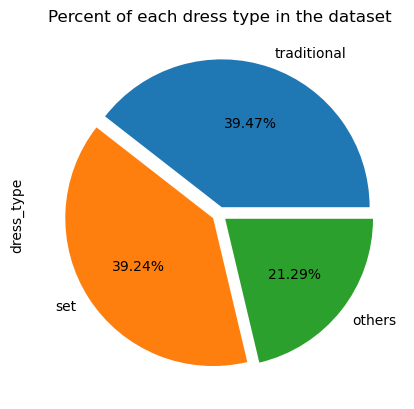

In [302]:
df_statistics["dress_type"].value_counts().plot(kind = "pie", explode = [0.05, 0.05, 0.05,], autopct = "%1.2f%%")
plt.title("Percent of each dress type in the dataset");

this grapgh shows **The percent of apperance of each dress type in the dataset** and it seems that **The traditional and the set have appeard nearly the same**

In [306]:
df_statistics.groupby("dress_type")["amount"].agg(["count", "mean", "max", "min"])

,count,mean,max,min
dress_type,,,,
others,26468,665.138598,2860.0,218.1
set,48784,836.352813,5584.0,357.0
traditional,49078,486.506784,2796.0,199.0


In [318]:
df_statistics.groupby("dress_type")["items_number"].mean()

dress_type
others         1.003363
set            1.002747
traditional    1.004340
Name: items_number, dtype: float64

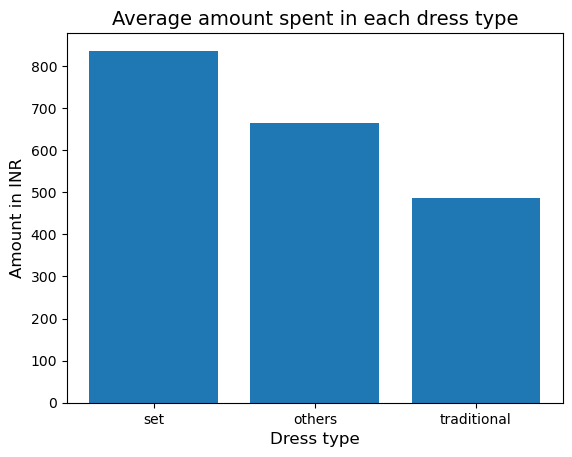

In [341]:
data = df_statistics.groupby("dress_type")["amount"].mean()

plt.bar([1,0,2], data, tick_label = ["others", "set", "traditional"])
plt.title("Average amount spent in each dress type", size = 14)
plt.xlabel("Dress type", size =12)
plt.ylabel("Amount in INR", size =12);

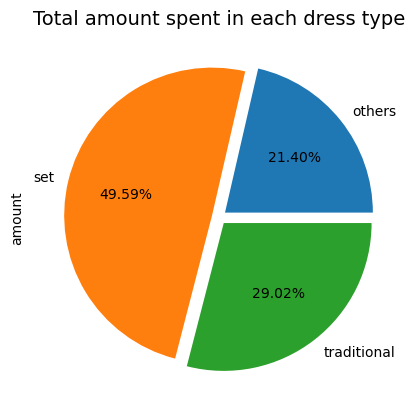

In [315]:
df_statistics.groupby("dress_type")["amount"].sum().plot(kind = "pie", explode = [0.05, 0.05, 0.05], autopct = "%1.2f%%")
plt.title("Total amount spent in each dress type", size = 14);

From thses two graphs we can say that **The set is higher in average and in total amount spent compared to any other dress type** and **There is a big demand on traditional clothes but they are cheep** but this doesn't mean that the set market is more proftiable because **we don't have any information about the cost in any category**

In [385]:
# I want to know who controls the most supply in each category "Amazon" or other merchants
df_statistics.groupby(["dress_type", "fulfilment"])["amount"].count()

dress_type   fulfilment
others       Amazon        16888
             Merchant       9580
set          Amazon        34355
             Merchant      14429
traditional  Amazon        34881
             Merchant      14197
Name: amount, dtype: int64

In [386]:
df_amazon = df_statistics[df_statistics["fulfilment"] == "Amazon"]

In [387]:
df_merchant = df_statistics[df_statistics["fulfilment"] == "Merchant"]

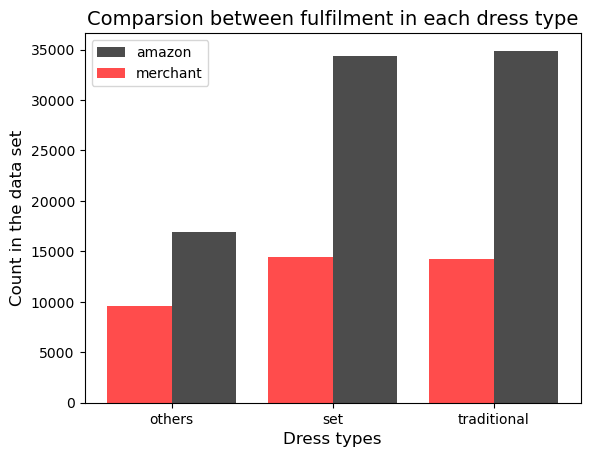

In [392]:
data_merchant = df_merchant.groupby("dress_type")["amount"].count()
data_amazon = df_amazon.groupby("dress_type")["amount"].count()

ind = np.arange(3)
tick_label = ["others", "set", "traditional"]

plt.bar(ind + 0.2, data_amazon, width = 0.4, tick_label = tick_label, label = "amazon", color = "black", alpha = 0.7)
plt.bar(ind - 0.2, data_merchant, width = 0.4, tick_label = tick_label , label = "merchant", color = "red", alpha = 0.7)

plt.title("Comparsion between fulfilment in each dress type", size = 14)
plt.xlabel("Dress types", size = 12)
plt.ylabel("Count in the data set", size = 12)
plt.xticks(ind, tick_label)
plt.legend();

we can see that **Amazon controls most of the supply in each dress type**

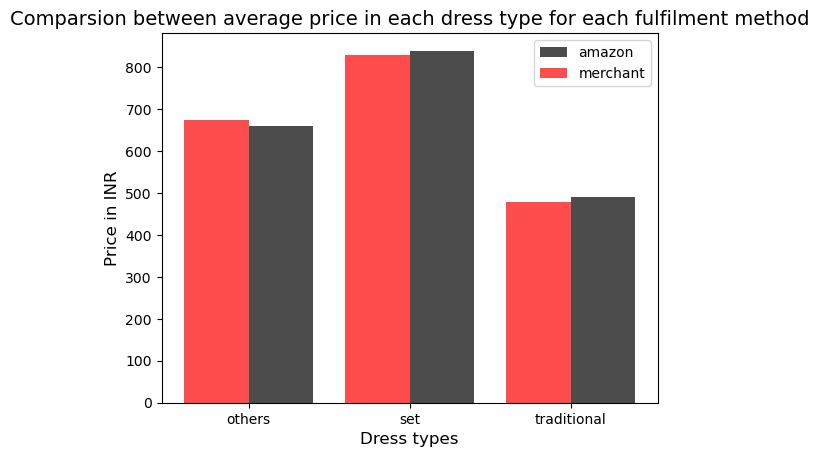

In [398]:
# i want to know if amazon sells with lower prices

data_merchant = df_merchant.groupby("dress_type")["amount"].mean()
data_amazon = df_amazon.groupby("dress_type")["amount"].mean()

ind = np.arange(3)
tick_label = ["others", "set", "traditional"]

plt.bar(ind + 0.2, data_amazon, width = 0.4, tick_label = tick_label, label = "amazon", color = "black", alpha = 0.7)
plt.bar(ind - 0.2, data_merchant, width = 0.4, tick_label = tick_label , label = "merchant", color = "red", alpha = 0.7)

plt.title("Comparsion between average price in each dress type for each fulfilment method", size = 14)
plt.xlabel("Dress types", size = 12)
plt.ylabel("Price in INR", size = 12)
plt.xticks(ind, tick_label)
plt.legend();

I found that **The average price is nearly the same for amazon and merchants so the price is not the reason for amazon to control most of the supply**

***Disclimar***
<br>This dataset doesn't provide us with the enough information to say what is the reason that amazon controls most of the supply

**Now i want to convert the direction of my analysis into cities and see how amnount spent and dress type is affected by each city**

In [400]:
df_statistics

,day,month,shipping_status,fulfilment,shipping_type,dress_type,size,items_number,amount,city,state
0,Saturday,april,cancelled,Merchant,Standard,set,S,1,647.62,MUMBAI,MAHARASHTRA
1,Saturday,april,shipped,Merchant,Standard,traditional,3XL,1,406.00,BENGALURU,KARNATAKA
2,Saturday,april,shipped,Amazon,Expedited,traditional,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA
3,Saturday,april,cancelled,Merchant,Standard,others,L,1,753.33,PUDUCHERRY,PUDUCHERRY
4,Saturday,april,shipped,Amazon,Expedited,others,3XL,1,574.00,CHENNAI,TAMIL NADU
...,...,...,...,...,...,...,...,...,...,...,...
128970,Tuesday,may,shipped,Amazon,Expedited,traditional,XL,1,517.00,HYDERABAD,TELANGANA
128971,Tuesday,may,shipped,Amazon,Expedited,set,M,1,999.00,GURUGRAM,HARYANA
128972,Tuesday,may,shipped,Amazon,Expedited,others,XXL,1,690.00,HYDERABAD,TELANGANA
128973,Tuesday,may,shipped,Amazon,Expedited,set,XS,1,1199.00,Halol,Gujarat


In [401]:
df_statistics["city"].nunique()

8955

In [405]:
df_statistics["state"].nunique()

69

In [450]:
df_statistics["state"].value_counts()

MAHARASHTRA        21509
KARNATAKA          16203
TAMIL NADU         11003
TELANGANA          10631
UTTAR PRADESH      10402
                   ...  
jammu & kashmir        1
orissa                 1
chhattisgarh           1
puducherry             1
AR                     1
Name: state, Length: 89, dtype: int64

We have something wierd in this dataset, in india there are 28 states and 8 unions with a total of 36 enities, but here it says 69 states

The proplem is that **Some values are wriiten in capital litters some are not** So i will try to fix this proplem by changing all the values to lower case letters

## Questions

<br>**- is dress type affected by state**
<br>**- What is the avergae amount in each state**
<br>**- Is there a brefered shipping type in states**
<br>**- Is there a size in each state**

In [ ]:
#This for loop will change all the values to lower case
start_time = time.time()

error_list = []

for index in range(len(df_statistics)):
    
    try:
        df_statistics["state"][index] = df_statistics["state"][index].lower()
    except:
        error_list.append(index)
        continue
      
    
end_time = time.time()

print("this took {} seconds.".format(end_time - start_time))

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\2442728820.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics["state"][index] = df_statistics["state"][index].lower()


In [454]:
len(error_list)

4485

We have a lot of errors

In [456]:
df_statistics.iloc[error_list[3]]

day                  Saturday
month                   april
shipping_status       shipped
fulfilment             Amazon
shipping_type       Expedited
                      ...    
size                       XL
items_number                1
amount                  399.0
city                  CHENNAI
state              tamil nadu
Name: 335, Length: 11, dtype: object

In [463]:
pd.set_option("display.max_rows", 10)

In [464]:
df_statistics["state"].value_counts()

maharashtra               20765
karnataka                 15572
tamil nadu                10565
telangana                 10215
uttar pradesh             10010
                          ...  
pondicherry                   1
apo                           1
pb                            1
punjab/mohali/zirakpur        1
Chandigarh                    1
Name: state, Length: 88, dtype: int64